# Project 3

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [31]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

#### 1. Let's create a frequency table of our variables

In [32]:
# frequency table for prestige and whether or not someone was admitted
frequency_table=pd.crosstab(index=df['admit'], 
            columns=df['prestige'])
frequency_table.index=['admitted','not admitted']

frequency_table

prestige,1.0,2.0,3.0,4.0
admitted,28,95,93,55
not admitted,33,53,28,12


## Part 2. Return of dummy variables

#### 2.1 Create class or dummy variables for prestige 

In [33]:
dummy_ranks=pd.get_dummies(df['prestige'],prefix='prestige')
dummy_ranks.columns=['prestige_1','prestige_2','prestige_3','prestige_4']
dummy_ranks

,prestige_1,prestige_2,prestige_3,prestige_4
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0
5,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0
7,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0
9,0.0,1.0,0.0,0.0


#### 2.2 When modeling our class variables, how many do we need? 



Answer: 4

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

In [38]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(dummy_ranks.ix[:,'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1  prestige_2  prestige_3  prestige_4
0      0  380.0  3.61         0.0         0.0         1.0         0.0
1      1  660.0  3.67         0.0         0.0         1.0         0.0
2      1  800.0  4.00         1.0         0.0         0.0         0.0
3      1  640.0  3.19         0.0         0.0         0.0         1.0
4      0  520.0  2.93         0.0         0.0         0.0         1.0


# crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [39]:
print pd.crosstab(handCalc['admit'], handCalc['prestige_1'], rownames=['admit'])



prestige_1  0.0  1.0
admit               
0           243   28
1            93   33


There is an 25/73 chance of being admitted to grad school if you attended a #1 ranked college. 

#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

There is a 101/198 chance of admission if you did not attend a #1 ranked college. 

#### 3.3 Calculate the odds ratio

Answer: The OR of #1 ranked college to colleges not ranked #1 is 1.26. Candidates who attended a #1 ranked college are 1.26 more likely to be admitted than candidates who did not. 


In [40]:
A=25.0/73
B=101.0/198
A/B

0.6713685067136851

#### 3.5 Print the cross tab for prestige_4

In [41]:
print pd.crosstab(handCalc['admit'], handCalc['prestige_4'], rownames=['admit'])

prestige_4  0.0  1.0
admit               
0           216   55
1           114   12


#### 3.6 Calculate the OR 

The OR for prestige_4 is 28/71. 

#### 3.7 Write this finding in a sentence

Answer: Attending a top ranked school increases your chance of admission by 4.5 (.82/.18). 

## Part 4. Analysis

In [42]:
dummy_ranks=pd.get_dummies(df['prestige'],prefix='prestige')
cols_to_keep=['admit','gre','gpa']
data=df[cols_to_keep].join(dummy_ranks.ix[:,'prestige_2':])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61           0.0           1.0           0.0
1      1  660.0  3.67           0.0           1.0           0.0
2      1  800.0  4.00           0.0           0.0           0.0
3      1  640.0  3.19           0.0           0.0           1.0
4      0  520.0  2.93           0.0           0.0           1.0


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [43]:
# manually add the intercept
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [44]:
train_cols= data.columns[1:]

#### 4.2 Fit the model

In [45]:
import statsmodels.api as sm
logit = sm.Logit(data['admit'],data[train_cols])
result =logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [46]:
print np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


#### 4.3 Print the summary results

In [47]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Aug 2016   Pseudo R-squ.:                 0.08166
Time:                        18:18:33   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [48]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%','OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


#### 4.5 Interpret the OR of Prestige_2

Answer: The 0R of prestige_2 is .51. Thus, the odds of being admitted when coming from a prestige_2 school are increased by .51.

#### 4.6 Interpret the OR of GPA

Answer: The OR of GPA is 2.18, which means that GPA has the most significant impact on whether a candidate is admitted or not. 

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

In [49]:
def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [50]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

[ 220.          284.44444444  348.88888889  413.33333333  477.77777778
  542.22222222  606.66666667  671.11111111  735.55555556  800.        ]
[ 2.26        2.45333333  2.64666667  2.84        3.03333333  3.22666667
  3.42        3.61333333  3.80666667  4.        ]


#### 5.1 Recreate the dummy variables

In [51]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0           0.0           0.0           1.0           0.0
1           0.0           0.0           1.0           0.0
2           1.0           0.0           0.0           0.0
3           0.0           0.0           0.0           1.0
4           0.0           0.0           0.0           1.0


#### 5.2 Make predictions on the enumerated dataset

In [54]:
combos.head()

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0,admit_pred
0,220.0,2.260000,1.0,1.0,0.0,1.0,0.0,0.048977
1,220.0,2.260000,2.0,1.0,0.0,1.0,0.0,0.048977
2,220.0,2.260000,3.0,1.0,0.0,0.0,0.0,0.164173
3,220.0,2.260000,4.0,1.0,0.0,0.0,1.0,0.039890
4,220.0,2.453333,1.0,1.0,0.0,0.0,1.0,0.046078


In [53]:
combos.columns = ['gre','gpa','prestige','intercept']
cols_to_keep = ['gre','gpa','prestige','intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:,'prestige_2':])
combos['admit_pred']= result.predict(combos[train_cols])
print combos.tail()

       gre       gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
395  800.0  3.806667       4.0        1.0           1.0           0.0   
396  800.0  4.000000       1.0        1.0           0.0           1.0   
397  800.0  4.000000       2.0        1.0           1.0           0.0   
398  800.0  4.000000       3.0        1.0           1.0           0.0   
399  800.0  4.000000       4.0        1.0           0.0           1.0   

     prestige_4.0  admit_pred  
395           0.0    0.545972  
396           0.0    0.419833  
397           0.0    0.582995  
398           0.0    0.582995  
399           0.0    0.419833  


#### 5.3 Interpret findings for the last 4 observations

Answer: 

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

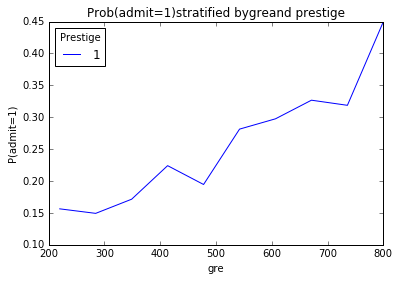

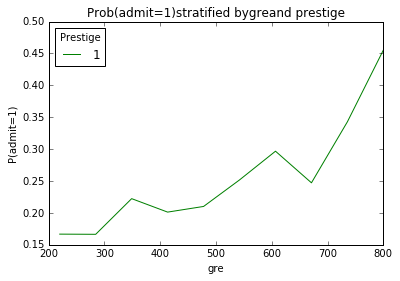

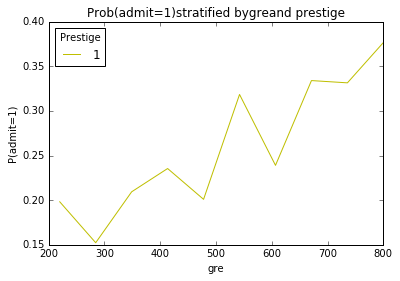

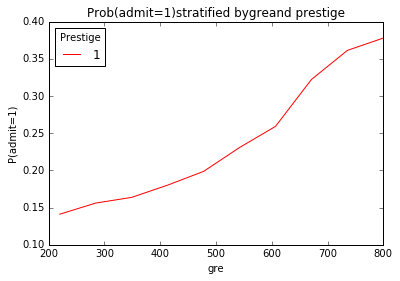

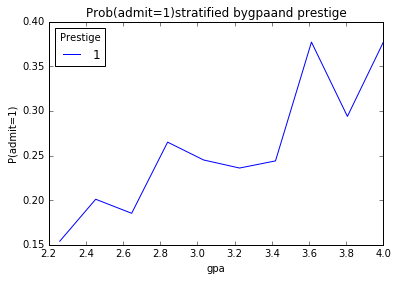

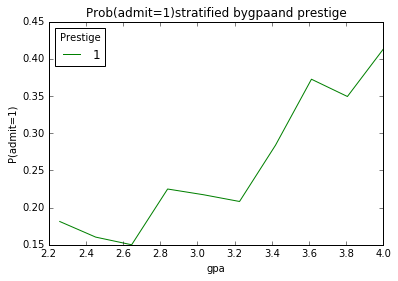

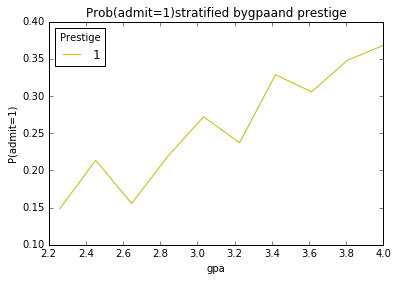

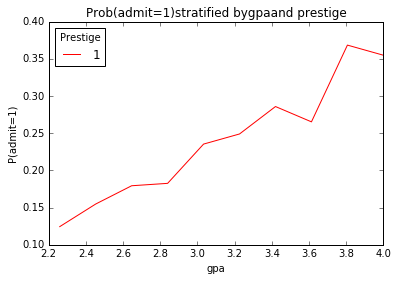

In [29]:
def stratified_score_plot(variable): 
    grouped = pd.pivot_table(combos, values=['admit_pred'], index= [variable, 'prestige'], aggfunc=np.mean)


    colors='rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0),plt_data['admit_pred'],color=colors[int(col)])
        pl.xlabel(variable)
        pl.ylabel('P(admit=1)')
        pl.legend(['1','2','3','4'],loc='upper left',title='Prestige')
        pl.title ('Prob(admit=1)stratified by' + variable + 'and prestige')
        pl.show()

stratified_score_plot('gre')
stratified_score_plot('gpa')
